# STAT207 Final Project - World Happiness

Aidan Yiyi, Youbeen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## 1. Introduction

## Project: World Happiness
**Motivation:**
We have found out that happiness level depends on many different factors not just financial security. According to an article by Ghosh, "Happiness levels depend not just on financial security, but also broader perceptions of one’s social support, personal freedom, and more."(Ghosh 2021). We wanted to explore what exact factors are the ones that affects the happniess level the most? Whar could we do to imporve our happiness level? Furthermore, how could countries increase their happiness level using the information we get from this research? We decided that finding the relationship between these variables to the happiness level(life ladder) is crucial in determining what factors affect one's happiness. 

reference: Ghosh, Iman. “Mapped: Global Happiness Levels in 2021.” Visual Capitalist, 23 Apr. 2023, www.visualcapitalist.com/mapped-global-happiness-levels-in-2021/#:~:text=Happiness%20levels%20depend%20not%20just%20on%20financial%20security%2C,of%20one%E2%80%99s%20social%20support%2C%20personal%20freedom%2C%20and%20more.




In [2]:
df = pd.read_csv('World_Happiness_Report.csv')
df.head(6)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847


**Research Questions:**
1. How are Log GDP per Capita, Healthy Life Expectancy at Birth, and Life Ladder all related in the dataset?

2. Is there an association between 'Region' and 'Life ladder' in this globe? Is there a difference between the mean life ladder of  'Sub-Saharan Africa' and NON- 'Sub-Saharan Africa' area in my population?

3. Is there an association between social support, healthy life expectancy at birth, freedom to make life choices, confidence in national government and  people's happiness level?

4. Is there a linear relationship between the log odds of Regional Indicators and Social Support, Freedom to make life choices, positive affect, and Confidence In National Government?


**Thinking Critically:**

Limitations we have is that this data has more information in terms of country and regions such as freedom to make life choices, social support, and log gdp per capita. With these information we are able to predict happiness level interms of regions and countries but not as smaller group of people. For example, this dataset could not predict my own happiness level specific to myself since it provides only categories of country and regions. 
This dataset holds information such as: regions, year, life ladder(happiness level), log GDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, genorsity, perceptions of corruption, positive affect, negative affect, and confidence in national government. 

Some informaion that are not included are the specific personal information of people such as their age, income, education level, marital status, nationality, and gender.

We would like to include information such as age, income, nationality, and gender to the dataset to predict specific data for smaller groups of people.

Some ethical issues of this research is that predicting happiness level outof financial factor such as GDP could be misleading since there are lots of debate whether wealth determines happiness or not. Also, happiness level is very subjective to each one and is hard to be standaridized out of number since it is a something that is not measured in number.


In [3]:
df['Country Name'].unique
df['Log GDP Per Capita'].unique()
df['Social Support'].unique()
df['Healthy Life Expectancy At Birth'].unique()
df['Freedom To Make Life Choices'].unique()
df['Generosity'].unique()
df['Perceptions Of Corruption'].unique()
df['Positive Affect'].unique()
df['Negative Affect'].unique()
df['Confidence In National Government'].unique()
df['Regional Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [4]:
missing_values=['nan']
df=pd.read_csv('World_Happiness_Report.csv', na_values=missing_values)
df=df.dropna()

In [5]:
df.shape

(1683, 13)

## 2. Descriptive Analytics

Descriptive Analytics Research Question:
How are Log GDP per Capita, Healthy Life Expectancy at Birth, and Life Ladder all related in the dataset?

In [6]:
subset = df[['Life Ladder', 'Log GDP Per Capita', 'Healthy Life Expectancy At Birth']]

summary_stats = subset.describe()
summary_stats

,Life Ladder,Log GDP Per Capita,Healthy Life Expectancy At Birth
count,1683.000000,1683.000000,1683.000000
mean,5.484487,9.355232,63.151230
std,1.149633,1.154303,7.178640
min,2.178809,5.526723,6.720000
25%,4.620406,8.427542,58.420000
50%,5.431614,9.508173,65.000000
75%,6.319366,10.316836,68.924999
max,7.970892,11.663788,74.349998


       Life Ladder  Log GDP Per Capita  Healthy Life Expectancy At Birth
count  1683.000000         1683.000000                       1683.000000
mean      5.484487            9.355232                         63.151230
std       1.149633            1.154303                          7.178640
min       2.178809            5.526723                          6.720000
25%       4.620406            8.427542                         58.420000
50%       5.431614            9.508173                         65.000000
75%       6.319366           10.316836                         68.924999
max       7.970892           11.663788                         74.349998
                                  Log GDP Per Capita  Life Ladder  \
Log GDP Per Capita                          1.000000     0.792572   
Life Ladder                                 0.792572     1.000000   
Healthy Life Expectancy At Birth            0.834306     0.735161   

                                  Healthy Life Expectancy At Birth

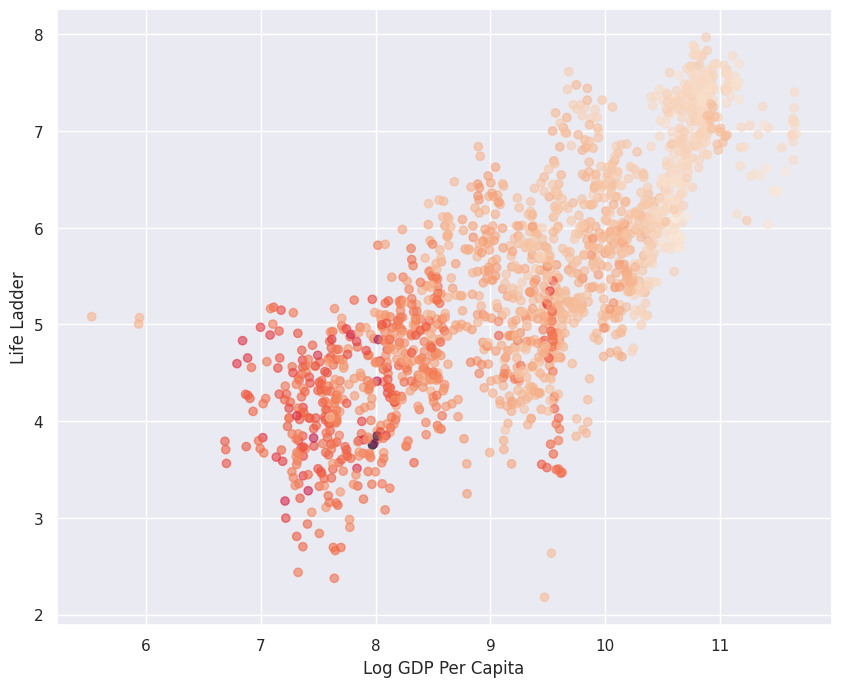

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(subset['Log GDP Per Capita'], subset['Life Ladder'], c=subset['Healthy Life Expectancy At Birth'], alpha=0.6)
ax.set_xlabel('Log GDP Per Capita')
ax.set_ylabel('Life Ladder')

print(summary_stats)
corr = subset[['Log GDP Per Capita', 'Life Ladder', 'Healthy Life Expectancy At Birth']].corr()
print(corr)

Visualization: Looking at the scatter plot, we can see that there is a positive relationship between Log GDP per Capita and Life Ladder - as Log GDP per Capita increases, Life Ladder tends to increase as well. The color of the points also shows us that there is a positive relationship between Healthy Life Expectancy at Birth and Life Ladder - countries with higher Healthy Life Expectancy at Birth tend to have higher Life Ladder scores. Additionally, we can see that there are a few outliers where countries have high Healthy Life Expectancy at Birth and high Life Ladder scores but lower Log GDP per Capita.

Interpretation: Based on our visualization and summary statistics, we can conclude that both Log GDP per Capita and Healthy Life Expectancy at Birth are positively associated with Life Ladder, and countries with higher values for these variables tend to have higher Life Ladder scores. However, there are some countries that have high Life Ladder scores despite having lower Log GDP per Capita, suggesting that other factors beyond economic growth and health may also contribute to overall life satisfaction.

In more detail: the average life ladder of the population is 5.48, with log GDP being 9.35 and Life Expectancy being 63.15. These factors all have a relatively strong correlation with one another: Log GDP Per Capita - 0.834306  Life Ladder - 0.735161  Healthy Life Expectancy At Birth - 1.000000. It is likely to assume the lower ones mean life ladder & a country's log GDP will cause a decrease in the country's life expectancy. 

## 3. Inference

Research question: Is there an association between 'Region' and 'Life ladder' in this globe? Is there a difference between mean life ladder of 'Sub-Saharan Africa' and NON- 'Sub-Saharan Africa' area in my populatioin?

In [8]:
#renamed some columns
df.rename(columns = {'Life Ladder':'Life_Ladder', 'Social Support':'Social_Support', 'Positive Affect':'Positive_Affect', 'Freedom To Make Life Choices' : 'Freedom_To_Make_Life_Choices', 'Confidence In National Government' : 'Confidence_In_National_Government','Regional Indicator':'Regional_Indicator'}, inplace = True)

In [9]:
# 'Sub-Saharan Africa':1, 'non-Sub-Saharan Africa':0
df['region']= 1*(df['Regional_Indicator'] == 'Sub-Saharan Africa')
df.head()

,Country Name,Regional_Indicator,Year,Life_Ladder,Log GDP Per Capita,Social_Support,Healthy Life Expectancy At Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions Of Corruption,Positive_Affect,Negative Affect,Confidence_In_National_Government,region
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0


Inference Parameter: difference between $ mu_0$  and $mu_1 $ where $ mu_0$ is the population mean of life ladder of regions that are NOT 'Sub-Saharan Africa' and $mu_1 $ is the population mean of life ladder of regions that are in 'Sub-Saharan Africa'.

- $H_0: \mu_0 - \mu_1 =0 $
- $H_A: \mu_0 - \mu_1 \neq 0 $


condition check:
1. sample that are in Sub-Saharan Africa is randomly sampled.
2. $n_{1}=403<10$% of all population that are in Sub-Saharan Africa
3. sample that are not in Sub-Saharan Africa is randomly sampled.
4. $n_{0}=1280<10$% of all population that are not in Sub-Saharan Africa
5. $n_{1}=403>30$
6. $n_{0}=1280>30$
7. We can assume that there is no pairwise relationship between regions in both groups in this sample

- All of the conditions are met, so we can proceed with conducting this hypothesis test.

- We are using $\alpha = 0.01$

In [10]:
sub_saharan_africa= df[df['region']==1]
sub_saharan_africa.shape

(403, 14)

In [11]:
not_sub_saharan_africa= df[df['region']==0]
not_sub_saharan_africa.shape

(1280, 14)

In [12]:
std_0= not_sub_saharan_africa['Life_Ladder'].std()
std_1= sub_saharan_africa['Life_Ladder'].std()
mean_0=not_sub_saharan_africa['Life_Ladder'].mean()
mean_1=sub_saharan_africa['Life_Ladder'].mean()
n_0=1280
n_1=403

In [13]:
point_estimate= (mean_0)- (mean_1)
stde= np.sqrt((std_0**2)/n_0 + (std_1**2)/n_1)
test_stat= (point_estimate-0)/stde
p_value= 2*(1-t.cdf(test_stat, df=402))

In [14]:
print('p-value:',  p_value)

p-value: 0.0


#### Conclusion on p-value using significance level of $\alpha=0.01$

Because $p-value=0.0\leq \alpha=0.01$ , we have enough evidence to reject the null hypothesis, $\mu_0-\mu_1 = 0 $. In context of our research question, this means that there is difference bewteen the mean of life ladder of 'sub_saharan_africa' and 'non_sub_saharan_africa' regions. In terms of our research question,this hypothesis test concludes that there is an association between regions and life ladder. There is a statistically significant difference between mean life ladder of sub-saharan Africa and NON-sun-saharan Africa which means that life ladder and regions are related.

## 4. Linear Regression

- Response variable: Life ladder (hapiness level)

- Explanatory variable 1: Social Support
- Explanatory variable 2: Healthy Life Expectancy At Birt
- Explanatory variable 3: reedom To Make Life Choices
- Explanatory variable 4: Confidence In National Government

Research question: is there an association between social support, healthy life expectancy at birth, freedom to make life choices, confidence in national government and people's happiness level in this sample?

In [15]:
df.rename(columns = {'Life Ladder':'Life_Ladder', 'Social Support':'Social_Support', 'Healthy Life Expectancy At Birth':'Healthy_Life_Expectancy_At_Birth', 'Freedom To Make Life Choices' : 'Freedom_To_Make_Life_Choices', 'Confidence In National Government' : 'Confidence_In_National_Government'}, inplace = True)

In [16]:
df.head()

,Country Name,Regional_Indicator,Year,Life_Ladder,Log GDP Per Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions Of Corruption,Positive_Affect,Negative Affect,Confidence_In_National_Government,region
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0


In [17]:
model = smf.ols(formula = 'Life_Ladder ~ Social_Support + Healthy_Life_Expectancy_At_Birth + Freedom_To_Make_Life_Choices + Confidence_In_National_Government', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life_Ladder   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     962.6
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        21:17:18   Log-Likelihood:                -1619.0
No. Observations:                1683   AIC:                             3248.
Df Residuals:                    1678   BIC:                             3275.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.8749      0.155    -18.599      0.000      -3.178      -2.572
Social_Support                        3.4209      0.172     19.860      0.000       3.083       3.759
Healthy_Life_Expectancy_At_Birth      0.0663      0.003     23.278      0.000       0.061       0.072
Freedom_To_Make_Life_Choices          2.0130      0.157     12.783      0.000       1.704       2.322
Confidence_In_National_Government    -0.2412      0.100     -2.401      0.016      -0.438      -0.044
==============================================================================
Omnibus:                       29.999   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.507
Skew:                           0.147   Prob(JB):                     2.93e-11
Kurtosis:                       3.778   Cond. No.                         853.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

regression model = -2.8749 + Social_Support * 3.4209 + Healthy_Life_Expectancy_At_Birth * 0.0663 + Freedom_To_Make_Life_Choices * 2.0130 + Confidence_In_National_Government * -0.2412

Condition 1: Linearity Condition

Because the distribution of points in the plot below are not roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition is not met.

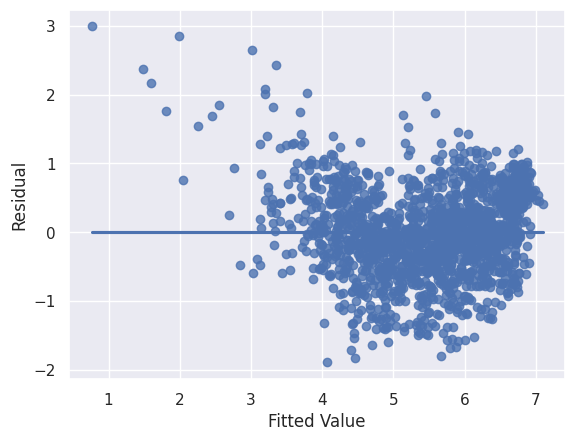

In [18]:
sns.regplot(x = model.fittedvalues, y = model.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of Residuals Condition

Because the y‑axis spread of points in the plot below changes as we move from left to right, we can
say that this condition is not met.

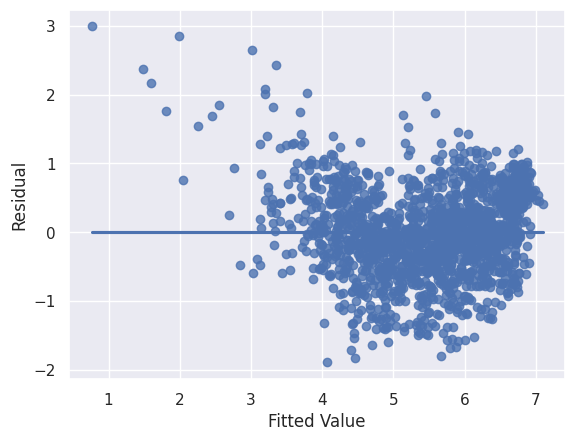

In [19]:
sns.regplot(x = model.fittedvalues, y = model.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are
normally distributed is slightly not met.

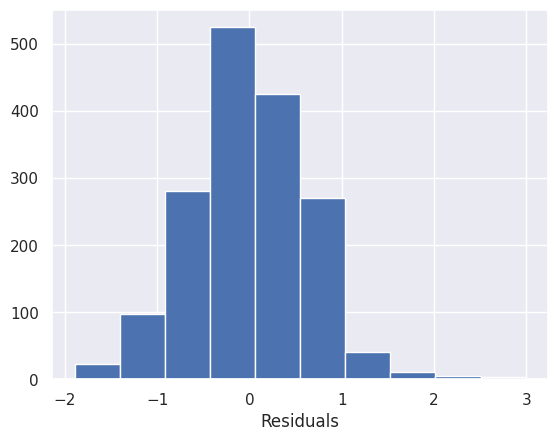

In [20]:
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4: Independence of Residuals Condition

- the data is randomly sampled and
- the sample size n = 1683 < 10% of all countries

In [21]:
df.shape[0]

1683

Condition 5: No Multicollinearity Condition

We see that there is no strong linear relationship between the explanatory variables. Thus the multicollinearity condition is not violated, and this condition is met.

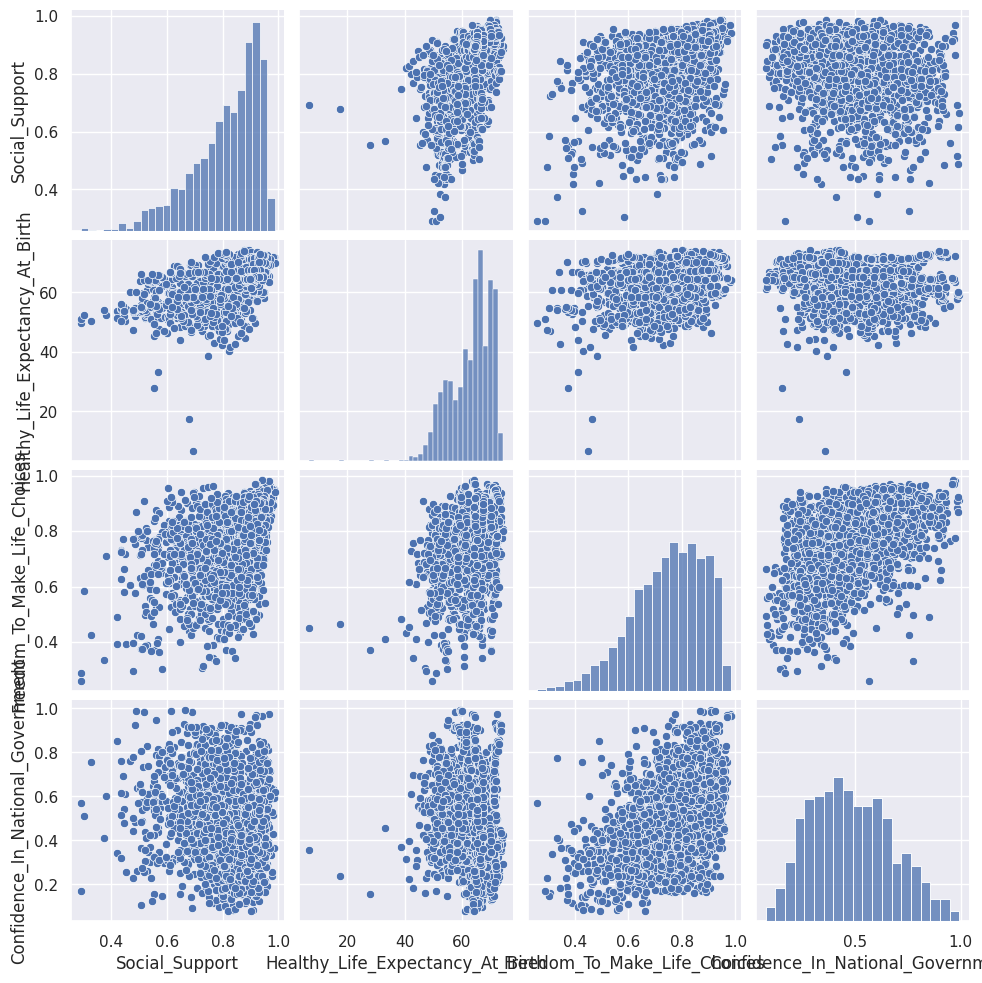

In [22]:
sns.pairplot(df[["Social_Support","Healthy_Life_Expectancy_At_Birth", "Freedom_To_Make_Life_Choices", "Confidence_In_National_Government"]])
plt.show()

In [23]:
df['log_Life_Ladder'] = np.log(df['Life_Ladder'])
df.head()

,Country Name,Regional_Indicator,Year,Life_Ladder,Log GDP Per Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions Of Corruption,Positive_Affect,Negative Affect,Confidence_In_National_Government,region,log_Life_Ladder
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,1.314688
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,1.482009
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,1.559907
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,1.343314
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,1.330501


In [24]:
model = smf.ols(formula = 'log_Life_Ladder ~ Social_Support + Healthy_Life_Expectancy_At_Birth + Freedom_To_Make_Life_Choices + Confidence_In_National_Government', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_Life_Ladder   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     941.7
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        21:17:23   Log-Likelihood:                 1164.1
No. Observations:                1683   AIC:                            -2318.
Df Residuals:                    1678   BIC:                            -2291.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.1055      0.030      3.566      0.000       0.047       0.163
Social_Support                        0.6788      0.033     20.596      0.000       0.614       0.743
Healthy_Life_Expectancy_At_Birth      0.0124      0.001     22.814      0.000       0.011       0.014
Freedom_To_Make_Life_Choices          0.3501      0.030     11.617      0.000       0.291       0.409
Confidence_In_National_Government    -0.0535      0.019     -2.782      0.005      -0.091      -0.016
==============================================================================
Omnibus:                       92.947   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.031
Skew:                          -0.254   Prob(JB):                     7.65e-58
Kurtosis:                       4.869   Cond. No.                         853.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Condition 1: Linearity Condition

Because the distribution of points in the plot below are roughly evenly distributed above and below the line
as we move from left to right, we can say the linearity condition not met.

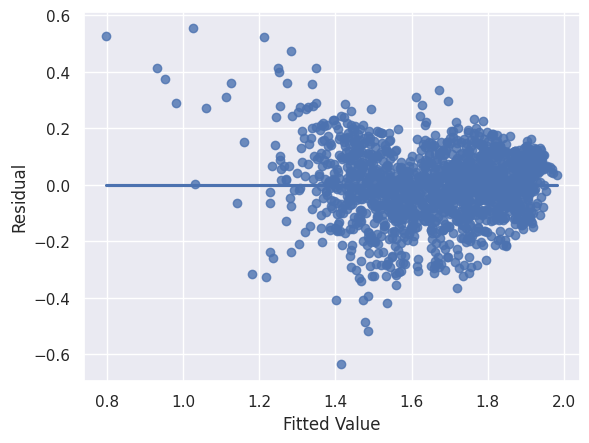

In [25]:
sns.regplot(x = model.fittedvalues, y = model.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of Residuals Condition

Because the y‑axis spread of points in the plot below does not change as we move from left to right, we can
say that this condition is met.

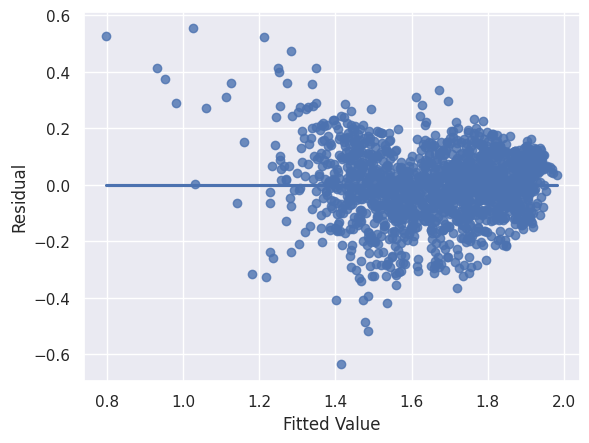

In [26]:
sns.regplot(x = model.fittedvalues, y = model.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is approxiamtely normally distributed, the assumption that the residuals are
normally distributed is met.

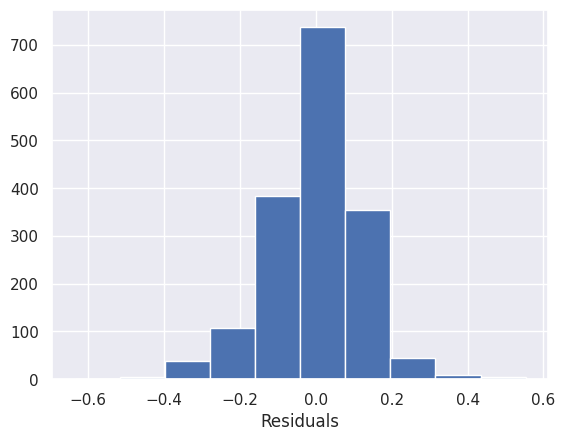

In [27]:
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4: Independence of Residuals Condition

- the data is randomly sampled and
- the sample size n = 1683 < 10% of all countries

Condition 5: No Multicollinearity Condition

We see that there is no strong linear relationship between the explanatory variables. Thus the multicollinearity condition is not violated, and this condition is met.

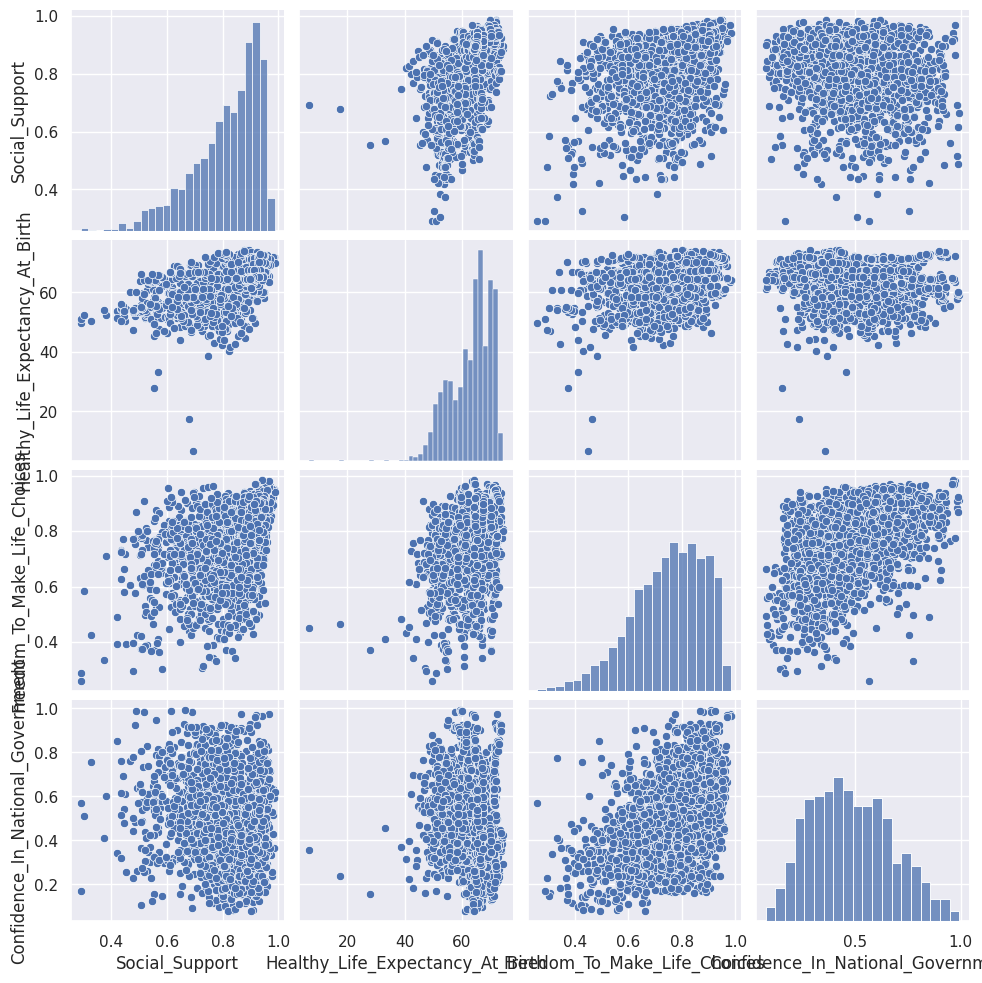

In [28]:
sns.pairplot(df[["Social_Support","Healthy_Life_Expectancy_At_Birth", "Freedom_To_Make_Life_Choices", "Confidence_In_National_Government"]])
plt.show()

In [29]:
R_squared = 0.692 * 100
R_squared

69.19999999999999

69.2% of the variation in the world hapiness level can be explained by its linear relationship with the social support, healthy life expectancy at birth, freedom to make life choice, and the confidence in national government. 

Prediction: what if we have 0.57 social support, 60 healthy life expectancy at birth, 0.85 freedom of make choice, and 0.7 confidence in national government?

In [30]:
model.predict(exog = dict(Social_Support=0.57, Healthy_Life_Expectancy_At_Birth=60, Freedom_To_Make_Life_Choices=0.85, Confidence_In_National_Government=0.7))

0    1.498841
dtype: float64

In [31]:
np.exp(1.498841)

4.476497801626873

Prediction: what if we have 0.9 social support, 60 healthy life expectancy at birth, 0.85 freedom of make choice, and 0.7 confidence in national government?

In [32]:
model.predict(exog = dict(Social_Support=0.9, Healthy_Life_Expectancy_At_Birth=60, Freedom_To_Make_Life_Choices=0.85, Confidence_In_National_Government=0.7))

0    1.722849
dtype: float64

In [33]:
np.exp(1.722849)

5.600461471662713

Hypothesis of testing the slope

- H0 : β = 0
- H1: β ≠ 0

At significance level 5%, we have sufficient evidence to suggest that all the slopes in our model are non-zero. According to the model summary that we have printed out, we can see that the p-value of social support slope, healthy life expectancy at birth slope, and the freedom to make choices slope are all zero. And the p-value of confidence in national government is 0.005. All those p-value are smaller than 0.05, which mean we have sufficient evidence to reject the null hypothesis. So, to answer the research question, there is a correlation between social support, healthy life expectancy at birth, freedom to make life choices, and  confidence in national government and people's hapiness level. Because all the slopes are not equal to 0, which means that each explanatory variable will affect the life ladder to some extent.



## 5. Logistic Regression

logistic regression research question: 
Is there a linear relationship between the log-odds of Regional Indicator and Social Support, Freedom to make life choices, positive affect, and Confidence In National Government?

In [34]:
df.rename(columns = {'Life Ladder':'Life_Ladder', 'Social Support':'Social_Support', 'Healthy Life Expectancy At Birth':'Healthy_Life_Expectancy_At_Birth', 'Freedom To Make Life Choices' : 'Freedom_To_Make_Life_Choices', 'Confidence In National Government' : 'Confidence_In_National_Government', 'Positive Affect' : 'Positive_Affect', 'Regional Indicator' : 'Regional_Indicator'}, inplace = True)

In [35]:
df['region']= 1*(df['Regional_Indicator'] == 'Sub-Saharan Africa')
df.head()

,Country Name,Regional_Indicator,Year,Life_Ladder,Log GDP Per Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions Of Corruption,Positive_Affect,Negative Affect,Confidence_In_National_Government,region,log_Life_Ladder
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,1.314688
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,1.482009
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,1.559907
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,1.343314
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,1.330501


In [36]:

df_train, df_test = train_test_split(df,
test_size=0.20,
random_state=123)

In [37]:
df_train.shape[0]/df.shape[0]

0.7997623291740938

In [38]:
pewmod = smf.logit('region ~ Social_Support + Freedom_To_Make_Life_Choices + Positive_Affect + Confidence_In_National_Government',
data=df_train).fit()
pewmod.bic

Optimization terminated successfully.
         Current function value: 0.393379
         Iterations 7


1095.0012490177567

In [39]:
test_model= smf.logit('region ~ Freedom_To_Make_Life_Choices + Positive_Affect + Confidence_In_National_Government',
data=df_train).fit()
test_model.bic

Optimization terminated successfully.
         Current function value: 0.457779
         Iterations 6


1261.159353377283

In [40]:
test_model = smf.logit('region ~ Social_Support + Positive_Affect + Confidence_In_National_Government',
data=df_train).fit()
test_model.bic

Optimization terminated successfully.
         Current function value: 0.419766
         Iterations 6


1158.828409147622

In [41]:
test_model = smf.logit('region ~ Social_Support + Freedom_To_Make_Life_Choices + Confidence_In_National_Government',
data=df_train).fit()
test_model.bic

Optimization terminated successfully.
         Current function value: 0.424550
         Iterations 6


1171.707566697746

In [42]:
test_model = smf.logit('region ~ Social_Support + Freedom_To_Make_Life_Choices + Positive_Affect ',
data=df_train).fit()
test_model.bic

Optimization terminated successfully.
         Current function value: 0.415736
         Iterations 7


1147.9802452160625

In [43]:
pewmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 region   No. Observations:                 1346
Model:                          Logit   Df Residuals:                     1341
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.2850
Time:                        21:17:29   Log-Likelihood:                -529.49
converged:                       True   LL-Null:                       -740.55
Covariance Type:            nonrobust   LLR p-value:                 4.597e-90
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             4.1347      0.624      6.623      0.000       2.911       5.358
Social_Support                       -9.8951      0.837    -11.827      0.000     -11.535      -8.255
Freedom_To_Make_Life_Choices         -6.8231      0.841     -8.117      0.000      -8.471      -5.175
Positive_Affect                       8.4021      0.980      8.572      0.000       6.481      10.323
Confidence_In_National_Government     3.8164      0.512      7.450      0.000       2.812       4.821
=====================================================================================================
"""

$log(\frac{\hat{p}}{1-\hat{p}}) = 4.1347-9.8951*SocialSupport -6.8231*FreedomToMakeLifeChoices + 8.4021* PositiveAffect+ 3.8164*ConfidenceInNationalGovernment $

- We set hypothesis of $H_0: \beta=0$, $H_A: \beta\neq 0$ for each of the coefficients. 
- We are using a significant level of 𝛼=0.10

- Because all the coefficient holds p-value =0.0<𝛼=0.10, we reject the null hypothesis. Thus we can say the following:
- there is sufficient evidence to suggest that the population slope of social_support, freedom to make life choices, positive affect, and confidence in national government in this model are all non-zero (ie.  𝛽≠0).

In [44]:
phat_test = pewmod.predict(exog = df_test)

In [45]:
df_test['phat_test'] = phat_test

In [46]:
fprs, tprs, thresholds = roc_curve(y_true = df_test['region'],
y_score = df_test['phat_test'])
auc = roc_auc_score(y_true = df_test['region'],
y_score = df_test['phat_test'])
print(auc)

0.8737943672839505


In [47]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color ='darkorange', lw = lw,
    label ='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()

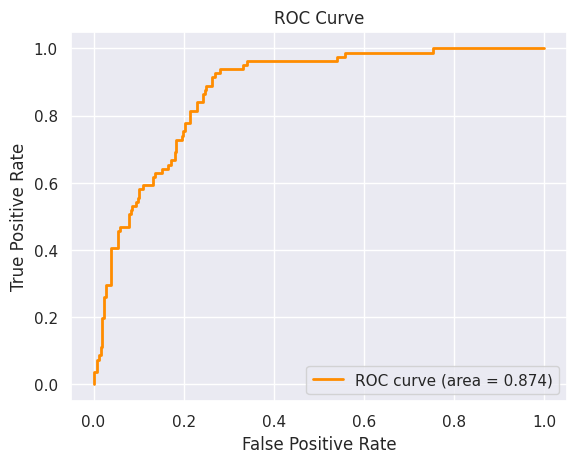

In [48]:
plot_roc(fprs, tprs, auc)

0.97 and 0.37

In [49]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
    'tpr':[tpr],
    'fpr':[fpr]})

In [50]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['region'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.984375
   threshold  tpr       fpr
0       0.02  1.0  0.949219
   threshold  tpr       fpr
0       0.03  1.0  0.867188
   threshold  tpr       fpr
0       0.04  1.0  0.789062
   threshold       tpr       fpr
0       0.05  0.987654  0.742188
   threshold       tpr      fpr
0       0.06  0.987654  0.65625
   threshold       tpr       fpr
0       0.07  0.987654  0.621094
   threshold       tpr       fpr
0       0.08  0.987654  0.558594
   threshold       tpr       fpr
0       0.09  0.962963  0.527344
   threshold       tpr       fpr
0        0.1  0.962963  0.476562
   threshold       tpr      fpr
0       0.11  0.962963  0.46875
   threshold       tpr       fpr
0       0.12  0.962963  0.429688
   threshold       tpr      fpr
0       0.13  0.962963  0.40625
   threshold       tpr       fpr
0       0.14  0.962963  0.386719
   threshold       tpr       fpr
0       0.15  0.962963  0.363281
   thresho

I would say that Model provides a classifier with the best possible performance is defined by being closest to the point (0,1). Identifying this point by eye, I would say that it have a false positive rate of about 0.37 and a true positive rate of about 0.97. According yo our research question, we want to correctly rocognize whether a region is Sub-Saharan Africa because we expect to see a difference of life ladder between Sub-Saharan Africa and non Sub-Saharan Africa, and to explore whether Sub-Saharan Africa will have a higher or lower life ladder than the other region. According our ROC curve, we can see that 0.37 and 0.97 is a good choice becasue increasing true positive rate after 0.97 will dramatically increase the false positive rate also, and decreasing the false positive rate will not inrease much true positive rate. So we want to find threshhold that is close to (0.97 --- tpr and 0.37 --- fpr). Finally, we can choose a threshold of 0.16 because it gives a 0.962963 --- tpr and  0.355469 --- fpr.

According to the above slope hypothesis test, we can see that all the coefficient holds p-value =0.0<𝛼=0.10, and thus we can reject the null hypothesis.Which means that there is sufficient evidence to suggest that the population slope of social_support, freedom to make life choices, positive affect, and confidence in national government in this model are all non-zero (ie.  𝛽≠0). And there is a correlation between those five variables and the regional indicator.



## 6. Conclusion

1. First, when relating three variables, we posed the question: 

Research Question 1: How are Log GDP per Capita, Healthy Life Expectancy at Birth, and Life Ladder all related in the dataset? The findings suggest that there is a fairly strong correlation between GDP & Life Ladder as well as a fairly strong connection between Life Expectancy & Life Ladder. With an r-value of 0.83 for GDP & an r-value of 0-4 for Life Ladder, it suggests that both of these factors are correlated to the Life Expectancy of a particular individual.  Additionally the means suggest the average life ladder of the population is 5.48, with log GDP being 9.35 and Life Expectancy being 63.15. These factors all have a relatively strong correlation with one another: Log GDP Per Capita - 0.834306  Life Ladder - 0.735161  Healthy Life Expectancy At Birth - 1.000000. It is likely to assume the lower ones mean life ladder & a country's log GDP will cause a decrease in the country's life expectancy. 

Research question 2: Is there an association between 'Region' and 'Life ladder' in my population? Is there a difference between the mean life ladder of  'Sub-Saharan Africa' and NON- 'Sub-Saharan Africa' area? Through the inference method, we found out that there is a difference between the sub saharan Africa region and regions that are not sub saharan Africa Which means that there is an association between regions and the life ladder. More specifically, m1 is the mean of the life ladder of sub Saharan Africa region, and m0 is the mean of the life ladder of NON- sub Saharan Africa region. Our calculated $p-value=0.0$ is less than $\alpha=0.01$, which means that we have enough evidence to reject the null hypothesis that there is no difference between means of the life ladder of the two regions. We can conclude since there is a difference between the mean life ladder of the two regions, there is an association between regions and the life ladder.

Research question 3:  Is there an association between social support, healthy life expectancy at birth, freedom to make life choices, confidence in the national government, and people's happiness level? According to the linear regression model. At a significance level of 5%, we have sufficient evidence to suggest that all the slopes in our model are non-zero. According to the model summary that we have printed out, we can see that the p-value of the social support slope, healthy life expectancy at the birth slope, and the freedom to make choices slope are all zero. And the p-value of confidence in the national government is 0.005. All those p-value are smaller than 0.05, which means we have sufficient evidence to reject the null hypothesis. So, to answer the research question, there is a correlation between social support, healthy life expectancy at birth, freedom to make life choices, and confidence in the national government, and people's happiness level. Because all the slopes are not equal to 0, which means that each of the five factors is correlated to the life ladder to some extent.

Research question 4: Is there a linear relationship between the log odds of Regional Indicators and Social Support, Freedom to make life choices, positive affect, and Confidence In National Government? According to the logistic regression slope hypothesis test, we can see that all the coefficient holds p-value =0.0<𝛼=0.10, and thus we can reject the null hypothesis. This means that there is sufficient evidence to suggest that the population slope of social_support, freedom to make life choices, positive affect, and confidence in national government in this model are all non-zero (i.e. 𝛽≠0). And there is a correlation between those five variables and the regional indicator.

2. In this particular dataset, there is a variable, 'Perceptions of Corruption' which is an indication of the mean population's opinions of how corrupt they believe their particular country is. This is a necessary factor to be considered when determining things like a country's life ladder as well as life expectancy since the way a country operates has a major effect on these variables. Considering research questions such as: what effect does the perception of corruption play on a country's life expectancy? Or, How are the perceptions of corruption correlated with a country's life expectancy & life ladder? These variables can give a better understanding of the multifactorial nature that is world happiness. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c788c974-e0bb-4cd9-90ea-45c2f1ed1b26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>